In [23]:
from sklearn.neighbors import KNeighborsClassifier as clfr
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

def HW():
    #########################################################
    url = 'https://raw.githubusercontent.com/ruiwu1990/CSCI_4120/master/KNN/iris.data'
    df = pd.read_csv(url, header=None)
    data = df.iloc[:, :-1].values
    labels = df.iloc[:, -1].values
    #For predictions
    final_predict = []
    #5 batches of 20 K's
    for i in range(5):
        # Load data
        predictions_batch = []
        X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=.33, random_state=i+1, shuffle=True)
        for k in range(1, 21):
            accuracy = 0
            neighbors = clfr(n_neighbors=k)
            neighbors.fit(X_train, y_train)
            predictions = neighbors.predict(X_test)
            #evaluate the precision
            for i, prediction in enumerate(predictions):
                if prediction == y_test[i]:
                    accuracy += 1
            accuracy /= len(predictions)
            #append to current batch list
            predictions_batch.append(accuracy)
        #Append all batches to list
        final_predict.append(predictions_batch)
    #convert data to np array for easy mean calculation:
    pred_arr = np.array(final_predict)
    print("ALL BATCHES:\n")
    print(pred_arr)
    print("\n***** K-Values averaged *****\n")
    average_per_k = np.mean(pred_arr, axis=0)
    for k in range(0,20):
        print(f"K-value: {k+1} | Score: {average_per_k[k]}")
    return average_per_k

/tmp/ipykernel_2923/3246665973.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


ALL BATCHES:

[[0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
  0.98 0.98 0.98 0.98 0.98 0.98]
 [1.   0.98 1.   1.   1.   1.   0.98 0.96 0.98 0.98 0.98 1.   0.98 0.98
  0.98 0.98 0.98 0.98 0.98 0.98]
 [0.96 0.96 0.94 0.94 0.94 0.94 0.94 0.96 0.96 0.92 0.96 0.94 0.94 0.96
  0.96 0.96 0.96 0.94 0.96 0.94]
 [0.96 0.96 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98 0.98
  0.98 0.98 0.98 0.98 0.98 0.98]
 [0.94 0.94 0.96 0.96 0.98 0.98 1.   1.   0.98 1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   0.98]]

***** K-Values averaged *****

K-value: 1 | Score: 0.968
K-value: 2 | Score: 0.9640000000000001
K-value: 3 | Score: 0.9719999999999999
K-value: 4 | Score: 0.9719999999999999
K-value: 5 | Score: 0.976
K-value: 6 | Score: 0.976
K-value: 7 | Score: 0.976
K-value: 8 | Score: 0.976
K-value: 9 | Score: 0.976
K-value: 10 | Score: 0.9719999999999999
K-value: 11 | Score: 0.9800000000000001
K-value: 12 | Score: 0.9800000000000001
K-value: 13 | Score: 0.976
K-value: 1

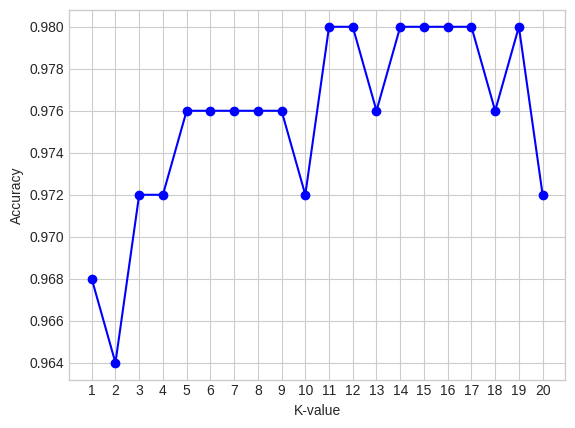

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

data = HW()
k_value = list(i for i in range(1,21))

plt.plot(k_value, data, marker='o', linestyle='-', color='b')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_value)
plt.show()